## Menentukan Pertanyaan Bisnis

- Bagaimana banyak peminjaman di setiap season ?
- Bagaimana banyak pengguna setiap bulannya ?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

Pada kali ini dataset yang digunakan adalah Bike Sharing Dataset.

In [2]:
df1 = pd.read_csv('day.csv')
df1

NameError: name 'pd' is not defined

### Assessing Data

#### Find Missing Value

In [66]:
df1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data yang digunakan tidak memiliki missing value

#### Find duplicates value

In [67]:
df1.duplicated().sum()

0

Dari pencarian nilai duplikat juga tidak terdeteksi adanya redudan data

#### Find outlier value


In [68]:
df1_numerics_only = df1.select_dtypes(include=np.number)
df1_numerics_only

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [69]:
q25, q75 = np.percentile(df1_numerics_only, 75), np.percentile(df1_numerics_only, 25)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off


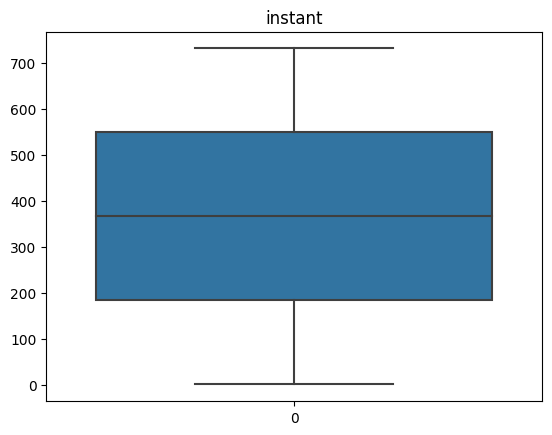

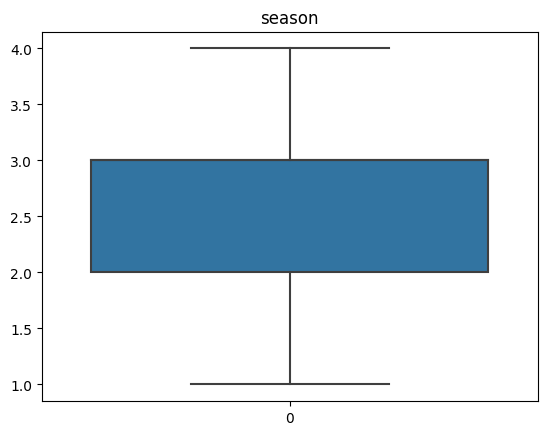

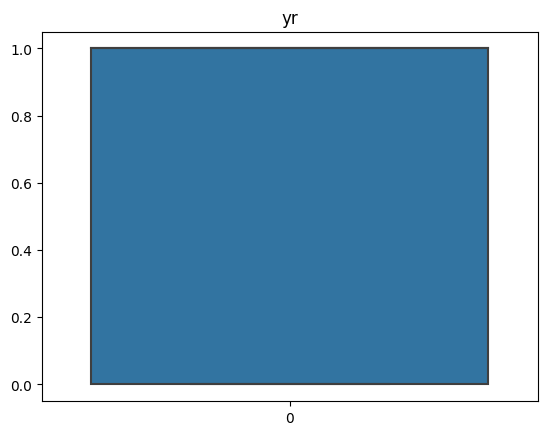

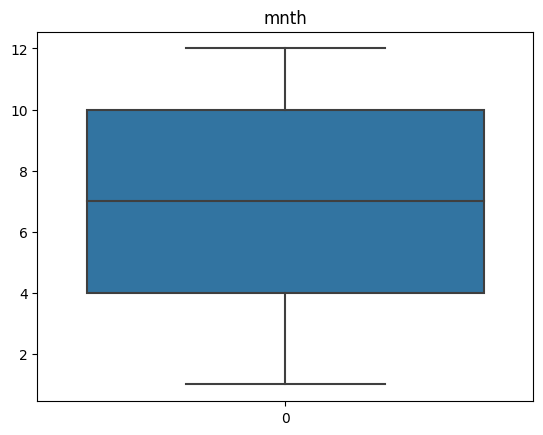

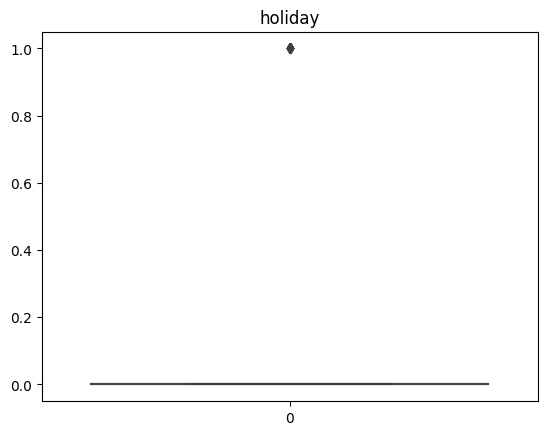

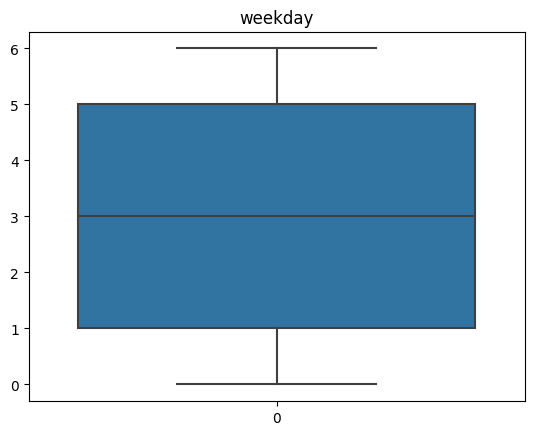

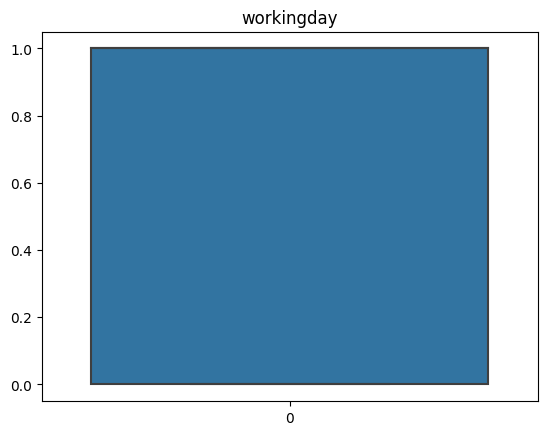

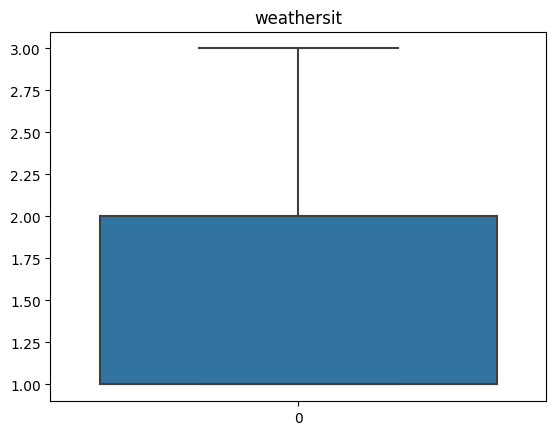

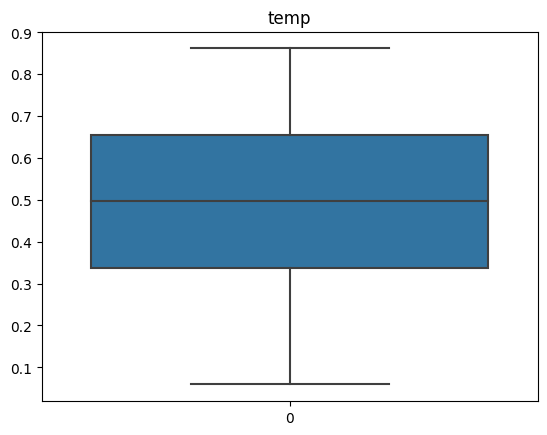

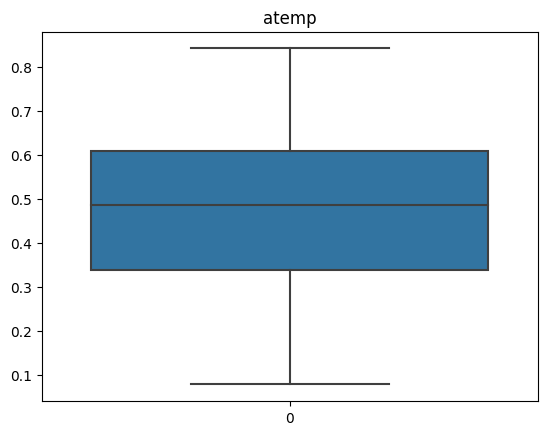

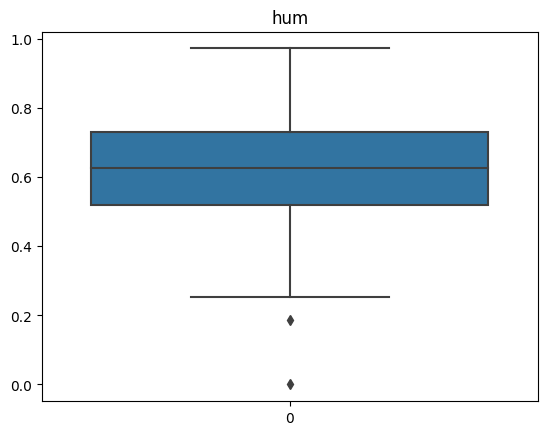

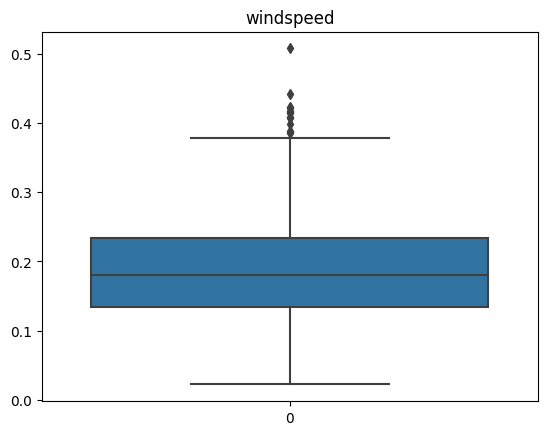

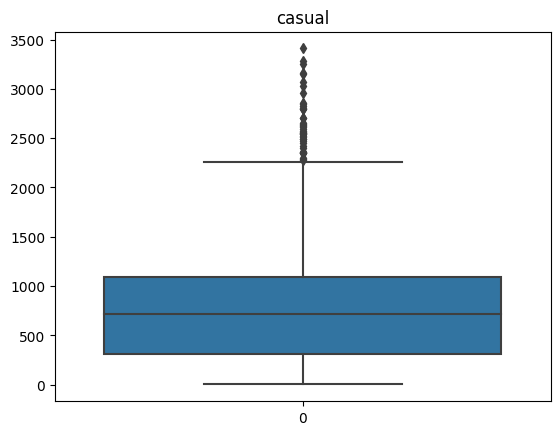

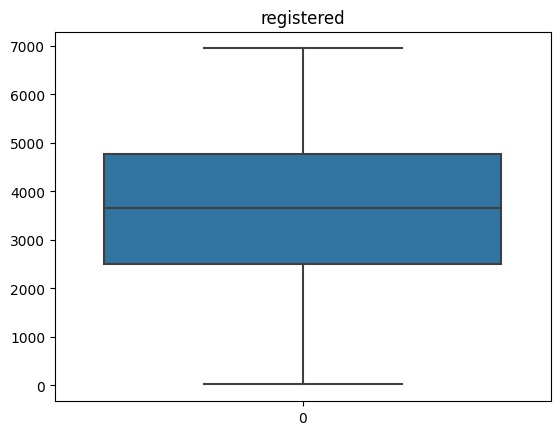

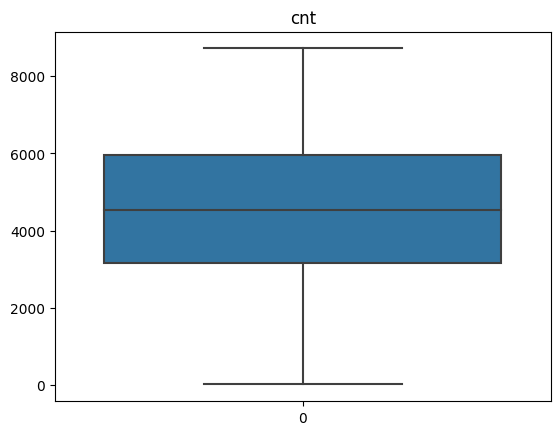

In [70]:
for i in df1_numerics_only.columns:
  plt.figure()
  plt.title(i)
  sns.boxplot(df1_numerics_only[i])


Walaupun terdapat outlier pada beberapa attribut hal ini tidak bberpengaruh dan belum perlu untuk dilakukan cleaning data.

### Cleaning Data

Pada data ini tidak diperlukan cleaning data karena data yang disediakan almost bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

In [71]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [72]:
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<ipython-input-72-c3cfa35fd7d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df1.corr(), dtype=np.bool)
<ipython-input-72-c3cfa35fd7d6>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1.corr(), dtype=np.bool)


<ipython-input-73-e424f44d56fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,mask=mask)


<Axes: >

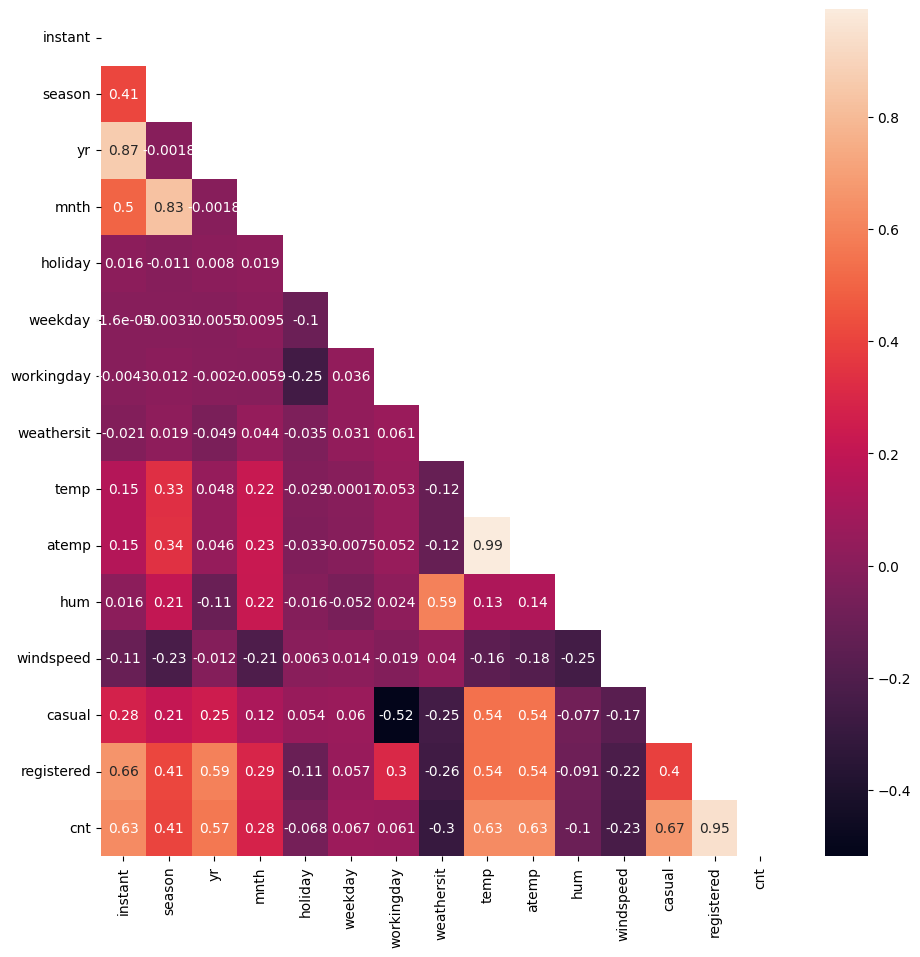

In [73]:
plt.figure(figsize=(11,11))
sns.heatmap(df1.corr(),annot=True,mask=mask)

Dari hasil korelasi data yang disediakan paling tertinggi terdapat pada korelasi antara registered dan cnt.

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

<Figure size 1100x1100 with 0 Axes>

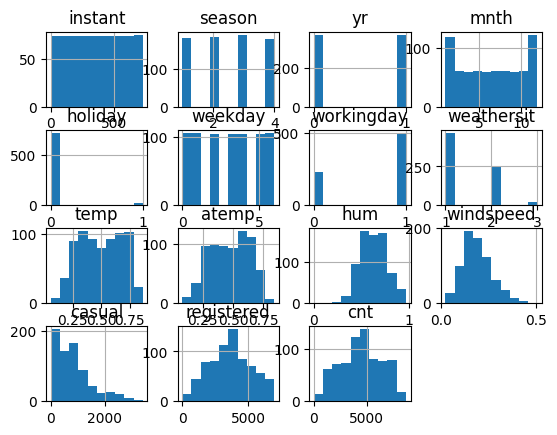

In [74]:
plt.figure(figsize=(11,11))
df1.hist()

In [75]:
df1[['season','cnt']].groupby('season').sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


Dari data ini terlihat bahwa season 2 memiliki transaksi terbanyak.

In [76]:
df1[['mnth','cnt']].groupby('mnth').sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


Jika dapat dilihat dengan angka maka bulan ke 6 memiliki frekuwensi tertinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

[Text(0.5, 1.0, 'Count of bikes during different Season')]

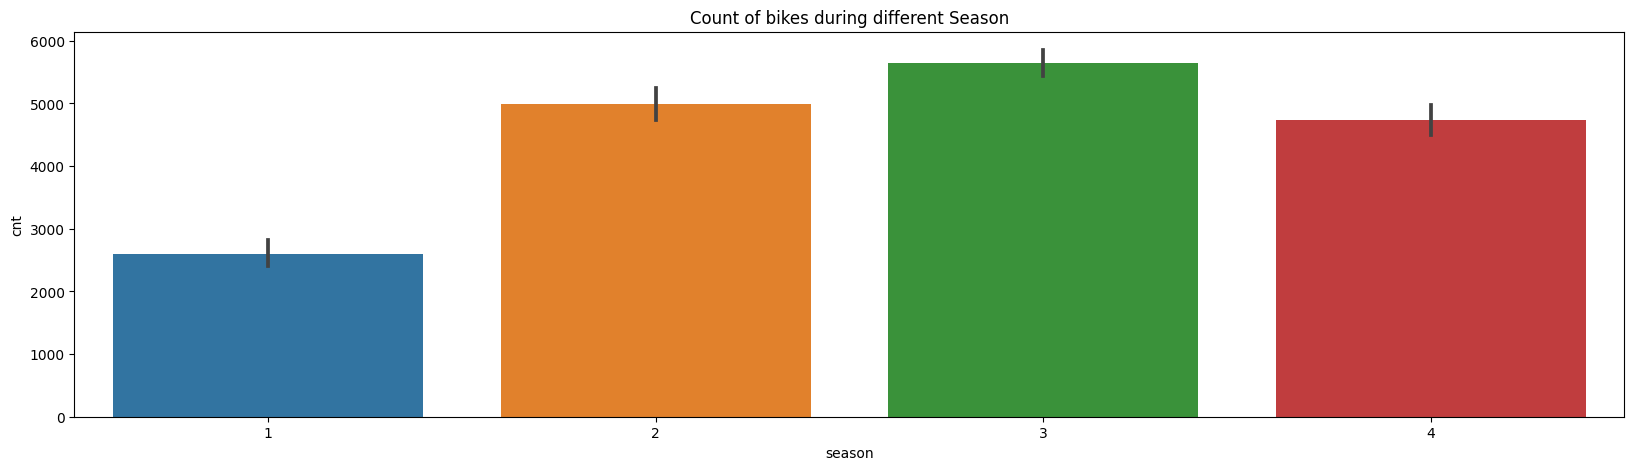

In [77]:
fig ,ax = plt.subplots(figsize = (20,5))
sns.barplot(data = df1 , x= 'season', y = 'cnt')
ax.set(title='Count of bikes during different Season')

### Pertanyaan 2:

[Text(0.5, 1.0, 'Count of bikes during different months')]

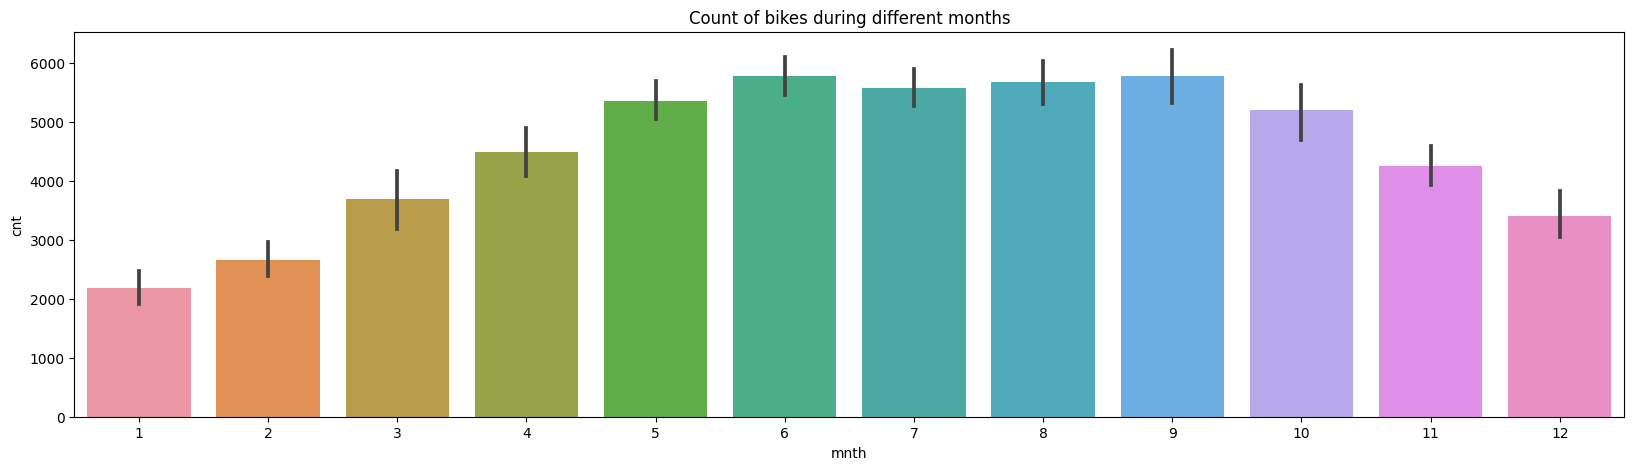

In [78]:
fig ,ax = plt.subplots(figsize = (20,5))
sns.barplot(data = df1 , x= 'mnth', y = 'cnt')
ax.set(title='Count of bikes during different months')

## Conclusion

- Peminjaman sepeda paling terbanyak terdapat pada musim ke 3, dimana peminjaman/rental terjadi sebanyak 1061129 kali
- Peminjaman/rental sepeda berdasarkan bulan yang paling tertinggi yaitu pada bulan ke 6 dengan peminjaman sebanyak 346342 kali.

In [80]:
!pip freeze | grep -v "^\-e" > requirements.txt